In [ ]:
                 #for numerical computing
import pandas as pd                  #used for data manipulation and analysis
import matplotlib.pyplot as plt      #for creating static, interactive, and publication-quality visualizations
import seaborn as sns                #for data visualization
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/onlinefrauddata.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            59305 non-null  int64  
 1   type            59305 non-null  object 
 2   amount          59305 non-null  float64
 3   nameOrig        59305 non-null  object 
 4   oldbalanceOrg   59305 non-null  float64
 5   newbalanceOrig  59305 non-null  float64
 6   nameDest        59305 non-null  object 
 7   oldbalanceDest  59305 non-null  float64
 8   newbalanceDest  59305 non-null  float64
 9   isFraud         59304 non-null  float64
 10  isFlaggedFraud  59304 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 5.0+ MB


In [ ]:
data.describe()    #shows mean, count , minimum and maximum values of the data.

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,59305.000000,5.930500e+04,5.930500e+04,5.930500e+04,5.930500e+04,5.930500e+04,59304.000000,59304.0
mean,7.696400,1.609305e+05,7.548601e+05,7.691323e+05,8.437803e+05,1.179318e+06,0.001754,0.0
std,1.970367,3.288074e+05,2.280381e+06,2.318159e+06,2.406815e+06,2.898252e+06,0.041841,0.0
min,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,8.361630e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,3.838890e+04,1.789500e+04,0.000000e+00,8.171000e+03,6.924040e+03,0.000000,0.0
75%,9.000000,1.939808e+05,1.441410e+05,1.580569e+05,4.857822e+05,9.224822e+05,0.000000,0.0
max,9.000000,1.000000e+07,2.850000e+07,2.860000e+07,3.020000e+07,3.200000e+07,1.000000,0.0


In [ ]:
#count the columns with different datatypes like Category, Integer, Float.

obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 1
Float variables: 7


<Axes: xlabel='type', ylabel='count'>

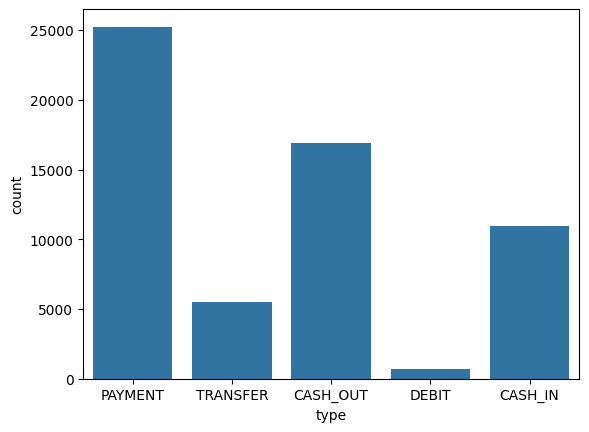

In [ ]:
#count plot of the Payment type column using Seaborn library
sns.countplot(x='type', data=data)

<Axes: xlabel='type', ylabel='amount'>

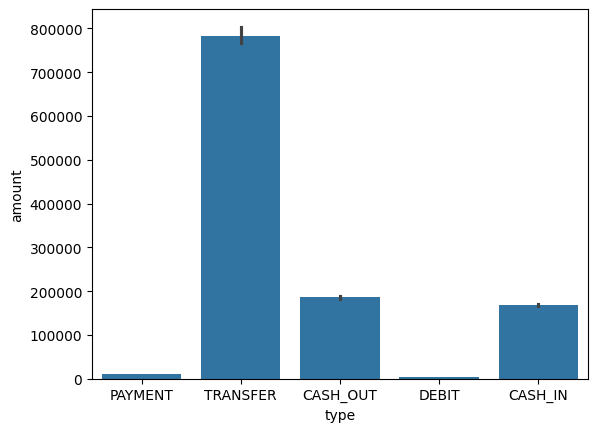

In [ ]:
sns.barplot(x='type', y='amount', data=data)

In [ ]:
# computes and returns the count of unique values in the 'isFraud' column of a DataFrame named 'data'

data['isFraud'].value_counts()

isFraud
0.0    59200
1.0      104
Name: count, dtype: int64

<ipython-input-30-7790d08bf794>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

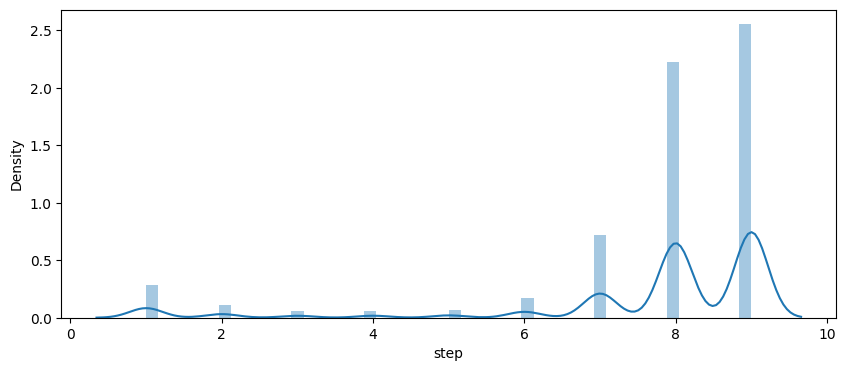

In [ ]:
plt.figure(figsize=(10, 4))
sns.distplot(data['step'], bins=50)

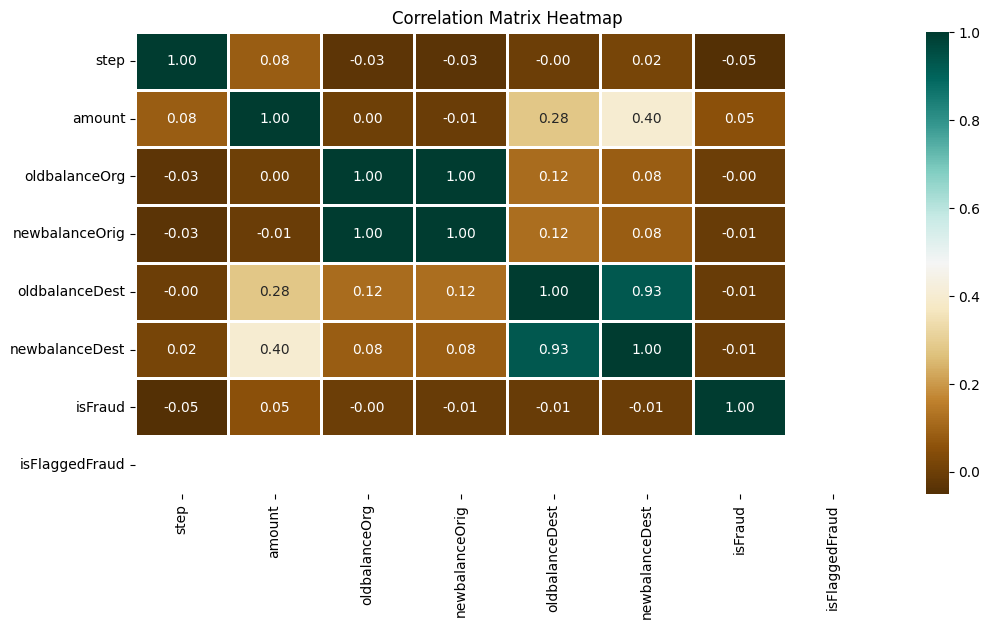

In [ ]:
# Creating a DataFrame
df = pd.DataFrame(data)

# Selecting only numeric columns for correlation
numeric_data = df.select_dtypes(include='number')

# Calculating correlation matrix
correlation_matrix = numeric_data.corr()

# Creating a heatmap  (heatmap used to visulize and assign colors to each values)
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
import pandas as pd
# Generating dummy variables
type_new = pd.get_dummies(data['type'], drop_first=True)
# Concatenating with original data
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,False,False,True,False


In [ ]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1) #Dropping Irrelevant Columns
y = data_new['isFraud']

In [ ]:
#check the shape of extracted data
X.shape, y.shape

((59305, 11), (59305,))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:
model = XGBClassifier(
    n_estimators=100,  # Example hyperparameters, adjust as needed
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

In [ ]:
# Splitting data into features and target variable
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Check for NaN values in y_train and remove corresponding rows in X_train and y_train
nan_indices = y_train.index[y_train.isnull()]
X_train = X_train.drop(nan_indices)
y_train = y_train.drop(nan_indices)

# Initialize and train the model
model = XGBClassifier()
model.fit(X_train, y_train)

predicted_proba = model.predict_proba(X_test)[:, 1]
custom_threshold = 0.3  # Adjust the threshold as needed
predicted_class_custom = (predicted_proba > custom_threshold).astype(int)

accuracy = accuracy_score(y_test, predicted_class_custom)
print(f"Accuracy with custom threshold: {accuracy:.4f}")
print(classification_report(y_test, predicted_class_custom))
print("AUC-ROC with custom threshold:", roc_auc_score(y_test, predicted_proba))


# Making predictions on the test set
y_pred = model.predict(X_test)

# Proceed with predictions and evaluation as before

Accuracy with custom threshold: 0.9993
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17759
         1.0       0.92      0.67      0.77        33

    accuracy                           1.00     17792
   macro avg       0.96      0.83      0.89     17792
weighted avg       1.00      1.00      1.00     17792

AUC-ROC with custom threshold: 0.9929698471283019


In [ ]:
#import sklearn

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Assuming 'y_test' contains the actual labels and 'y_pred' contains the predicted labels
nan_indices = np.isnan(y_test)
y_test_without_nan = y_test[~nan_indices]
y_pred_without_nan = y_pred[~nan_indices]

accuracy = accuracy_score(y_test_without_nan, y_pred_without_nan)
print(f"Accuracy: {accuracy:.4f}")

# Additional evaluation metrics
print(classification_report(y_test_without_nan, y_pred_without_nan))
print("AUC-ROC:", roc_auc_score(y_test_without_nan, y_pred_without_nan))

Accuracy: 0.9993
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17759
         1.0       1.00      0.64      0.78        33

    accuracy                           1.00     17792
   macro avg       1.00      0.82      0.89     17792
weighted avg       1.00      1.00      1.00     17792

AUC-ROC: 0.8181818181818181


In [ ]:
# Now proceed with evaluating the model using accuracy_score and other metrics
#accuracy = accuracy_score(y_test, y_pred)
#print(f"Accuracy: {accuracy:.4f}")

# Additional evaluation metrics
#print(classification_report(y_test, y_pred))
#print("AUC-ROC:", roc_auc_score(y_test, y_pred))


In [1]:
 import numpy as np

 #Assuming 'new_features' is your array of new data points#
new_features = np.array([[8,9,7]])
from xgboost import XGBClassifier

# Initialize and train your XGBoost model (replace with your actual training process)
model = XGBClassifier()

# Placeholder for training data - replace with your actual data
X_train = np.array([[1, 2, 3,], [4, 5, 6]])  # Example training features
y_train = np.array([0, 1])  # Example training labels

# Train the model
model.fit(X_train, y_train)

# Now you can predict using the trained model
predicted_class = model.predict(new_features)
# Converting predicted class to 'Fraud' or 'No Fraud'
predicted_label = "Fraud" if predicted_class[0] == 1 else "No Fraud"
print("Predicted class for the new data:", predicted_class[0])
print("PREDICTED LABEL FOR THE NEW DATA:", predicted_label)

Predicted class for the new data: 0
PREDICTED LABEL FOR THE NEW DATA: No Fraud


In [ ]:
 import numpy as np
 #Assuming 'new_features' is your array of new data points
new_features = np.array([[6,7,88]])
from xgboost import XGBClassifier

# Initialize and train your XGBoost model (replace with your actual training process)
model = XGBClassifier()
# Placeholder for training data - replace with your actual data

y_train = np.array([0, 1])  # Example training labels
# Train the model
model.fit(X_train, y_train)

# Now you can predict using the trained model
predicted_class = model.predict(new_features)
# Converting predicted class to 'Fraud' or 'No Fraud'
predicted_label = "fraud" if predicted_class[0] != 1 else "  no Fraud"
print("Predicted class for the new data:", predicted_class[0])
print("PREDICTED LABEL FOR THE NEW DATA:", predicted_label)

Predicted class for the new data: 0
PREDICTED LABEL FOR THE NEW DATA: fraud
